# Os mapas adicionados com a Cartopy são um tanto limitados. Existe a possibilidade de adicionar shapefiles com a Cartopy, como vamos ver neste script.

Init: 2021-07-22 00:00:00 UTC
Run: 00Z
Forecast: +0
Valid: 2021-07-22 00:00:00 UTC


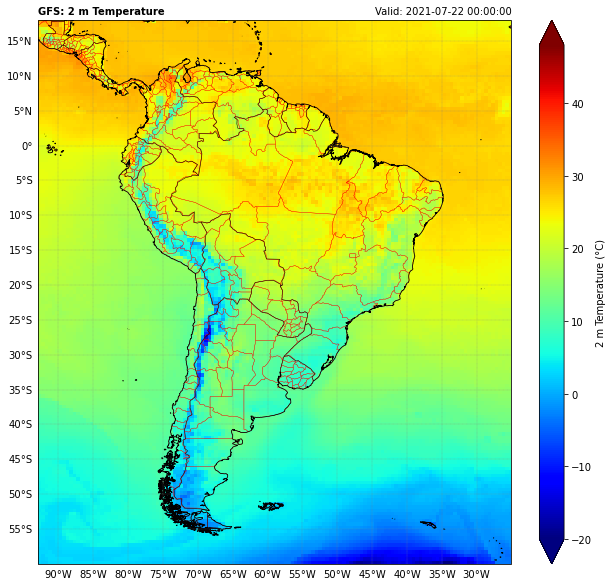

In [1]:
#-----------------------------------------------------------------------------------------------------------
# Curso INPE / CPTEC Training: NWP Data Processing With Python - Script 5: Adding a Shapefile
# Instrutor: Diego Souza
# Adaptado: Dejanira F Braz
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
#----------------------------------------------------------------------------------------------------------- 

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")
 
# Select the variable
grb = grib.select(name='2 metre temperature')[0]

# Get information from the file    
init  = str(grb.analDate)      # Init date / time
run   = str(grb.hour).zfill(2) # Run
ftime = str(grb.forecastTime)  # Forecast hour
valid = str(grb.validDate)     # Valid date / time 
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------
# Convert from K to °C
tmtmp = tmtmp - 273.15

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
#shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
# or
# https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip
shapefile = list(shpreader.Reader('Shapefile/ne_10m_admin_1_states_provinces.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='red',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot the image
img = ax.imshow(tmtmp, origin='lower', extent=img_extent, vmin=-20, vmax=48, cmap='jet')

# Add a colorbar
plt.colorbar(img, label='2 m Temperature (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('Figure/image_5.png')

# Show the image
plt.show()

Init: 2021-07-22 00:00:00 UTC
Run: 00Z
Forecast: +0
Valid: 2021-07-22 00:00:00 UTC


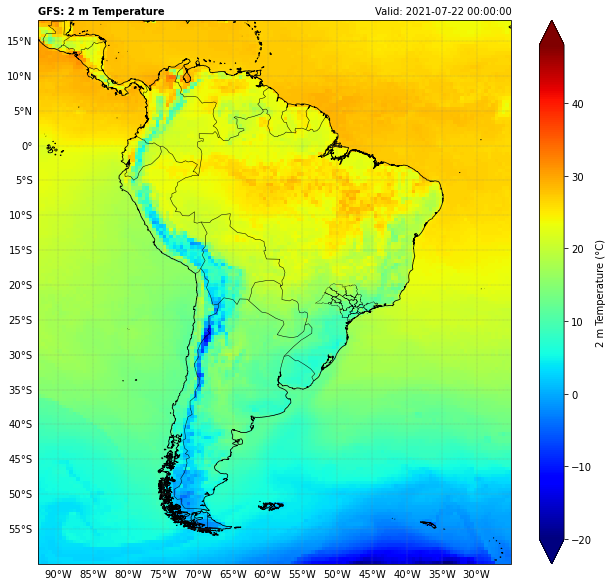

In [18]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 5: Adding a Shapefile
# Author: Diego Souza 
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np     

# Scientific computing with Python
#----------------------------------------------------------------------------------------------------------- 

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")
 
# Select the variable
grb = grib.select(name='2 metre temperature')[0]

# Get information from the file    
init  = str(grb.analDate)      # Init date / time
run   = str(grb.hour).zfill(2) # Run
ftime = str(grb.forecastTime)  # Forecast hour
valid = str(grb.validDate)     # Valid date / time 
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------
# Convert from K to °C
tmtmp = tmtmp - 273.15

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
#shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
# or
# https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip
shapefile = list(shpreader.Reader('SP_Mesorregioes_2020.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot the image
img = ax.imshow(tmtmp, origin='lower', extent=img_extent, vmin=-20, vmax=48, cmap='jet')

# Add a colorbar
plt.colorbar(img, label='2 m Temperature (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('image_5.png')

# Show the image
plt.show()

In [26]:
# import packages
import iris
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import iris.plot as iplt
import iris.quickplot as qplt
import iris.pandas
import os

RuntimeError: 

Ambiguous 'iris' package.
Please use either:

**illumon-iris** - Python integration for Illumon Iris, a time-series database
  - pip install illumon-iris
  - https://pypi.python.org/pypi/illumon-iris
  - https://deephaven.io/

**SciTools Iris** - Python library for analysing and visualising meteorological and oceanographic data sets
  - http://scitools.org.uk/iris/

**info.gianlucacosta.iris** - A general-purpose library for Python
  - pip install info.gianlucacosta.iris
  - https://pypi.python.org/pypi/info.gianlucacosta.iris

**irisapi** - Iris is a highly configurable and flexible service for paging and messaging
  - pip install irisapi
  - https://pypi.org/project/irisapi/
  - https://iris.claims/
